In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#pd.set_option("display.max_rows", 1000)
pd.set_option("display.max_columns", 100)

In [2]:
file_paths = {'in':'../../../data/prepared/activity_log_prepared.csv',
              'out_missing':'../../../data/prepared/activity_log_missing.csv',
              'out_train':'../../../data/prepared/activity_log_train.csv',
              'out_test':'../../../data/prepared/activity_log_test.csv',
             }

df = pd.read_csv(file_paths['in'])

# guarantee the timestamps are datetime objects
time_columns = ['start_time','end_time']

for time_col in time_columns:
    df[time_col] = pd.to_datetime(df[time_col])

# 1. Collect & Save the Missing Exertion Ratings 

In [3]:
filt_missing = df['simple_exertion'].isna()
df_missing = df.loc[filt_missing, :].reset_index(drop=True)
df_missing.shape

(38, 30)

In [4]:
df_missing.to_csv(file_paths['out_missing'], index=False)

In [5]:
# keep only the non-missing data for test/train split
df = df.loc[~filt_missing, :]

# 2. Stratified Train/Test Split

### Get the Base Frequencies of each Class

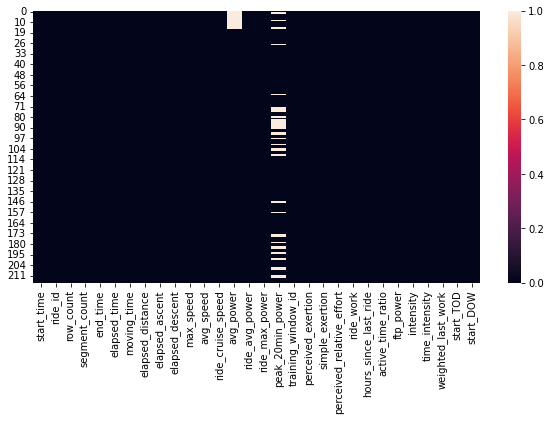

In [6]:
fig = plt.figure(figsize=(10,5))
_ = sns.heatmap(df.isna())

In [7]:
df['simple_exertion'].value_counts()

NORMAL    104
HARD       49
EASY       27
Name: simple_exertion, dtype: int64

In [8]:
df['simple_exertion'].value_counts(normalize=True)

NORMAL    0.577778
HARD      0.272222
EASY      0.150000
Name: simple_exertion, dtype: float64

## Train/Test Splitting

In [9]:
from sklearn.model_selection import train_test_split

In [10]:
X, y = df, df['simple_exertion']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [11]:
X_train['simple_exertion'].value_counts(normalize=True)

NORMAL    0.540741
HARD      0.281481
EASY      0.177778
Name: simple_exertion, dtype: float64

In [12]:
X_test['simple_exertion'].value_counts(normalize=True)

NORMAL    0.688889
HARD      0.244444
EASY      0.066667
Name: simple_exertion, dtype: float64

## Stratified Split

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=42)

In [14]:
X_train['simple_exertion'].value_counts(normalize=True)

NORMAL    0.579365
HARD      0.269841
EASY      0.150794
Name: simple_exertion, dtype: float64

In [15]:
X_test['simple_exertion'].value_counts(normalize=True)

NORMAL    0.574074
HARD      0.277778
EASY      0.148148
Name: simple_exertion, dtype: float64

In [16]:
y.value_counts(normalize=True)

NORMAL    0.577778
HARD      0.272222
EASY      0.150000
Name: simple_exertion, dtype: float64

## Saving Split

In [17]:
X_train.to_csv(file_paths['out_train'], index=False)

In [18]:
X_test.to_csv(file_paths['out_test'], index=False)

In [19]:
X_test.shape

(54, 30)

In [20]:
X_test['simple_exertion'].value_counts(normalize=False)

NORMAL    31
HARD      15
EASY       8
Name: simple_exertion, dtype: int64